In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import numpy as np
import torch
from glob import glob

In [39]:
fnames = glob('*.pt')
fnames

['dkl_reg_mses_torch_200iter.pt',
 'bdkl_reg_mses_pyro_5000iter.pt',
 'bdkl_reg_mses_pyro_1000iter.pt',
 'bdkl_reg_mses_pyro.pt',
 'bdkl_reg_mses_pyro_1000iter_1e-1lr.pt',
 'dkl_reg_mses_torch_200iter_lr1e-2.pt',
 'bdkl_reg_mses_pyro_10000iter.pt',
 'bdkl_reg_mses_numpyro.pt',
 'dkl_reg_mses_torch_1000iter.pt',
 'dkl_reg_mses_torch_100iter.pt']

In [40]:
tdict = {}
for fname in fnames:
    tdict[fname[:-3]] = torch.load(fname)

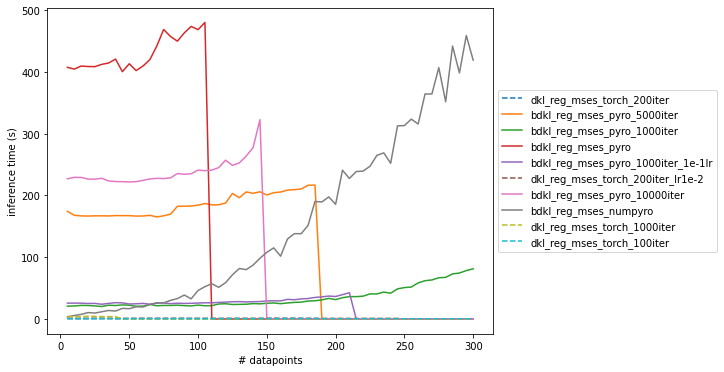

In [41]:
# 1st: # datapoints vs. time
dp = range(5,305,5)
for key in tdict:
    if 'bdkl' in key:
        time = tdict[key][:,4]
        plt.plot(dp, time, label=key)
    else:
        time = tdict[key][:,2]
        plt.plot(dp, time, label=key, linestyle='dashed')
plt.xlabel('# datapoints')
plt.ylabel('inference time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

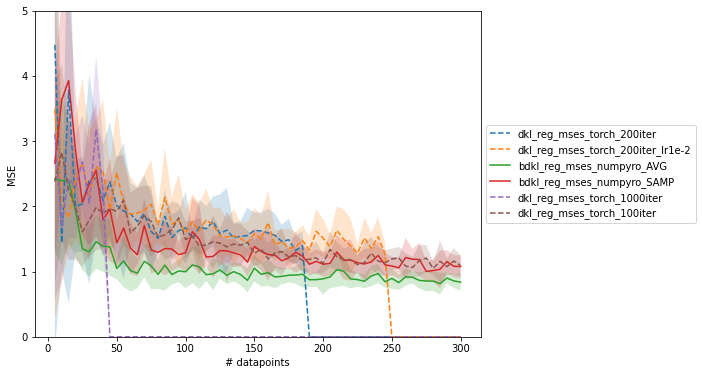

In [42]:
# 1st: # datapoints vs. time
dp = range(5,305,5)
for key in tdict:
    if 'bdkl' in key and 'numpyro' in key:
        mavg, savg = tdict[key][:,0], tdict[key][:,1]
        msamp, ssamp = tdict[key][:,2], tdict[key][:,3]
        plt.plot(dp, mavg, label=key+'_AVG')
        plt.fill_between(dp, mavg-savg, mavg+savg, alpha=.2)
        plt.plot(dp, msamp, label=key+'_SAMP')
        plt.fill_between(dp, msamp-ssamp, msamp+ssamp, alpha=.2)
    elif 'pyro' not in key:
        mavg, savg = tdict[key][:,0], tdict[key][:,1]
        plt.plot(dp, mavg, label=key, linestyle='dashed')
        plt.fill_between(dp, mavg-savg, mavg+savg, alpha=.2)
plt.xlabel('# datapoints')
plt.ylabel('MSE')
plt.ylim((0,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

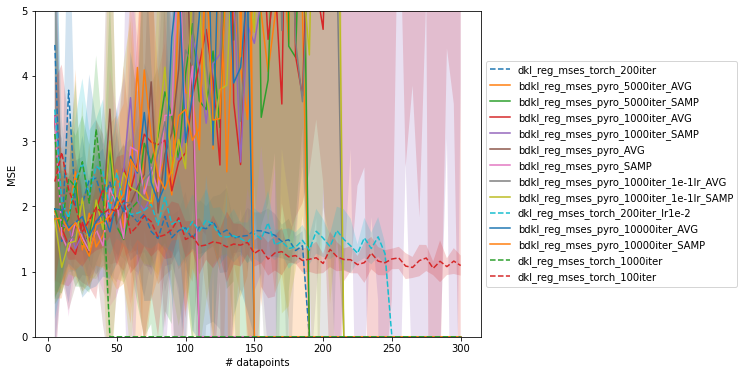

In [43]:
# 1st: # datapoints vs. time
dp = range(5,305,5)
for key in tdict:
    if 'bdkl' in key and '_pyro' in key:
        mavg, savg = tdict[key][:,0], tdict[key][:,1]
        msamp, ssamp = tdict[key][:,2], tdict[key][:,3]
        plt.plot(dp, mavg, label=key+'_AVG')
        plt.fill_between(dp, mavg-savg, mavg+savg, alpha=.2)
        plt.plot(dp, msamp, label=key+'_SAMP')
        plt.fill_between(dp, msamp-ssamp, msamp+ssamp, alpha=.2)
    elif 'pyro' not in key:
        mavg, savg = tdict[key][:,0], tdict[key][:,1]
        plt.plot(dp, mavg, label=key, linestyle='dashed')
        plt.fill_between(dp, mavg-savg, mavg+savg, alpha=.2)
plt.xlabel('# datapoints')
plt.ylabel('MSE')
plt.ylim((0,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()